# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

#### Importing required files :

In [329]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib notebook

#### Creating a connection to the sqlite database :

In [330]:
conn = sqlite3.connect("./../../../../Datasets/European soccer databse 2008-16/database.sqlite")

#### Fetching required tables form the dataset and storing them in the required database :

In [331]:
countries = pd.read_sql_query("select * from Country", conn)
leagues =  pd.read_sql_query("Select * from League", conn)
matches = pd.read_sql_query("Select * from Match", conn)
teams = pd.read_sql_query("Select * from Team", conn)
team_attributes = pd.read_sql_query("Select * from Team_Attributes", conn)
# players = pd.read_sql_query("Select * from Player", conn)
# player_attributes = pd.read_sql_query("Select * from Player_Attributes", conn)

### Understanding the structure of dataframes :

#### Printing top 5 columns to understand the structure and identify required attributes and data frames :

In [332]:
print("COUNTRIES: \n \n",countries.head(),
      "\n \n LEAGUES: \n \n",leagues.head(),
      "\n \n TEAMS: \n \n",teams.head()
#       "\n \n PLAYERS: \n \n",players.head()
     )

COUNTRIES: 
 
       id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy 
 
 LEAGUES: 
 
       id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A 
 
 TEAMS: 
 
    id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB


In [333]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


###   _In this notebook i will concentrate on the performances of the top teams in the English Premier League :_ 

#### Reducing the Matches dataset to only specific league :

In [334]:
# i/p : league_name ; o/p : league_id (id of the specied league)
def get_league_id(league_name) :
    league_id = leagues[leagues["name"] == "England Premier League"].loc[:,"id"].iloc[0]
    return league_id

# i/p : league_id; o/p : league_matches_dataframe - ( all the matches from a specific league )
def get_league_matches(league_id):
    df = matches[matches["league_id"] == league_id]
    return df

In [335]:
# fetching all EPL matches from the matches dataframe
league_name = "England Premier League"
league_id = get_league_id(league_name)

# EPL matches dataframe
epl_matches_df = get_league_matches(league_id) 
print("EPL matches dataframe structure : \n \n Rows = {} Columns = {} \n \n Top 5 columns : \n \n {}"
      .format(epl_matches_df.shape[0],
              epl_matches_df.shape[1],
              epl_matches_df.head())
     )

EPL matches dataframe structure : 
 
 Rows = 3040 Columns = 115 
 
 Top 5 columns : 
 
         id  country_id  league_id     season  stage                 date  \
1728  1729        1729       1729  2008/2009      1  2008-08-17 00:00:00   
1729  1730        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1730  1731        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1731  1732        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1732  1733        1729       1729  2008/2009      1  2008-08-17 00:00:00   

      match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
1728        489042             10260             10261               1  ...   
1729        489043              9825              8659               1  ...   
1730        489044              8472              8650               0  ...   
1731        489045              8654              8528               2  ...   
1732        489046             10252              8456      

#### Removing unncessary columns from EPL matches dataframe:

In [336]:
# REMOVING : PLAYER INFORMATION COLUMNS, MATCH EVENT COLUMNS AND BETTING ODDS COLUMNS FOR THAT MATCH:
# REMOVING: country Id, league Id and date of the match information
# Setting index to 'id column'
# renaming some columns {'home_team_api_id' : 'home_team_id', 'away_team_api_id': 'away_team_id','stage' : 'match_day'}
epl_matches_df = (epl_matches_df.iloc[:,0:11]
                  .drop(columns=['country_id', 'league_id', 'date'])
                  .set_index('id')
                  .rename({'home_team_api_id' : 'home_team_id', 'away_team_api_id': 'away_team_id','stage' : 'match_day', 'match_api_id' : 'match_id'}, axis= 1)
                 )


In [337]:
# i/p : list of team ids o/p : dict of team id and team name
def get_team_name(team_id_list):
    team_long_name = {}
    team_short_name = {}
    for id in team_id_list:
        team_long_name[id] = teams[teams['team_api_id'] == id]['team_long_name'].iloc[0]
        team_short_name[id] = teams[teams['team_api_id'] == id]['team_short_name'].iloc[0]
    return (team_long_name, team_short_name)

In [338]:
def add_result_column(row):
    if row['home_team_goal'] == row['away_team_goal']:
        row["result"] = 'draw'
    elif row['home_team_goal'] > row['away_team_goal']:
        row["result"] = 'home'
    else:
        row['result'] = 'away'
    return row    

def add_team_names(row, team_name_dict):
    row["home_team"] = team_name_dict[row['home_team_id']]
    row["away_team"] = team_name_dict[row['away_team_id']]
    return row

full_name_dict, short_name_dict = get_team_name(epl_matches_df['home_team_id'].unique())

# adding result column
epl_matches_df = (epl_matches_df.apply(add_result_column, axis=1)
                                .apply(add_team_names, args=(full_name_dict,), axis=1))

In [339]:
epl_matches_df.head()

,season,match_day,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,result,home_team,away_team
id,,,,,,,,,,
1729,2008/2009,1,489042,10260,10261,1,1,draw,Manchester United,Newcastle United
1730,2008/2009,1,489043,9825,8659,1,0,home,Arsenal,West Bromwich Albion
1731,2008/2009,1,489044,8472,8650,0,1,away,Sunderland,Liverpool
1732,2008/2009,1,489045,8654,8528,2,1,home,West Ham United,Wigan Athletic
1733,2008/2009,1,489046,10252,8456,4,2,home,Aston Villa,Manchester City


#### Finding the top 4 performing teams in the premier league from 2008-16 :
 - Top performing teams over a period is calculated based on **win percentage** of a team over that period.
 - In case of same win percentage we consider **draw %** 

In [340]:
def set_winner(row):
    if row['result'] == 'home':
        row['winner'] = row['home_team']
    elif row['result'] == 'away':
        row['winner'] = row['away_team']
    else:
        row['winner'] = 'draw'
    return row

epl_matches_df = epl_matches_df.apply(set_winner, axis = 1)

In [341]:
top_6_teams = (epl_matches_df.groupby('winner')['match_id']
                       .agg({'count'})
                       .rename({'count' : 'win_count'}, axis = 1)
                       .sort_values('win_count',axis = 0, ascending = False)
                       .iloc[1:7,:]
        )

# top teams over the specific period based on win count
top_6_teams

,win_count
winner,
Manchester United,192
Chelsea,176
Manchester City,175
Arsenal,170
Tottenham Hotspur,151
Liverpool,150


#### Reducing the matches dataset to keep only the top 6 teams required :

In [342]:
epl_top6_matches= epl_matches_df[epl_matches_df['home_team'].isin(top_6_teams.index.tolist()) | epl_matches_df['away_team'].isin(top_6_teams.index.tolist())]

In [343]:
epl_top6_matches.head()

,season,match_day,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,result,home_team,away_team,winner
id,,,,,,,,,,,
1729,2008/2009,1,489042,10260,10261,1,1,draw,Manchester United,Newcastle United,draw
1730,2008/2009,1,489043,9825,8659,1,0,home,Arsenal,West Bromwich Albion,Arsenal
1731,2008/2009,1,489044,8472,8650,0,1,away,Sunderland,Liverpool,Liverpool
1733,2008/2009,1,489046,10252,8456,4,2,home,Aston Villa,Manchester City,Aston Villa
1735,2008/2009,1,489048,8549,8586,2,1,home,Middlesbrough,Tottenham Hotspur,Middlesbrough


#### Home wins, away wins home goals scored and away goals scored : 

In [344]:
def get_home_record(df):
    home_record = (df[df["home_team"]
                  .isin(top_6_teams.index.tolist())]
                  .groupby(['home_team','result'])['winner']
                  .agg('count')
                  .to_frame('record'))
    return home_record

def get_away_record(df):
    away_record = (df[df["away_team"]
                  .isin(top_6_teams.index.tolist())]
                  .groupby(['away_team','result'])['winner']
                  .agg('count')
                  .to_frame('record'))
    return away_record

def get_away_goals(df):
    away_goals = (df[df["away_team"].isin(top_6_teams.index.tolist())].groupby("away_team")['away_team_goal']
                 .agg(np.sum)
                 .to_frame("total_away_goals")
                 .sort_values('total_away_goals', ascending = False)
#                  .iloc[0:6,:]
               )
    return away_goals

def get_home_goals(df):
    home_goals = (df[df["home_team"].isin(top_6_teams.index.tolist())].groupby("home_team")['home_team_goal']
                 .agg(np.sum)
                 .to_frame("total_home_goals")
                 .sort_values('total_home_goals', ascending = False)
#                  .iloc[0:6,:]
               )
    return home_goals

In [345]:
def performance_trend(df):
     
    return performance_trend 

In [346]:
def home_performance(series):
    temp = series.value_counts()
    points = 0
    if 'draw' in temp.index:
        points = points + temp['draw']
    if 'home' in temp.index:
        points = points + (temp["home"]*3)
    return points

home_performance = (epl_top6_matches[epl_top6_matches["home_team"].isin(top_6_teams.index.tolist())]
                                                                  .groupby(['season','home_team'])
                                                                   ['result'].agg(home_performance)
                                                                   .to_frame('home_points')
                                                                   .reset_index()          
                                                                   .rename({'home_team' : 'team'}, axis = 1)
                    )
home_performance.head()

,season,team,home_points
0,2008/2009,Arsenal,38
1,2008/2009,Chelsea,39
2,2008/2009,Liverpool,43
3,2008/2009,Manchester City,39
4,2008/2009,Manchester United,50


In [347]:
def away_performance(series):
    temp = series.value_counts()
    points = 0
    if 'draw' in temp.index:
        points = points + temp['draw']
    if 'away' in temp.index:
        points = points + (temp["away"]*3)
    return points

away_performance = (epl_top6_matches[epl_top6_matches["away_team"].isin(top_6_teams.index.tolist())]
                                                                  .groupby(['season','away_team'])
                                                                   ['result'].agg(away_performance)
                                                                   .to_frame('away_points')
                                                                   .reset_index()        
                                                                   .rename({'away_team' : 'team'}, axis = 1)
                    )
away_performance.head()

,season,team,away_points
0,2008/2009,Arsenal,34
1,2008/2009,Chelsea,44
2,2008/2009,Liverpool,43
3,2008/2009,Manchester City,11
4,2008/2009,Manchester United,40


In [348]:
full_performance = pd.merge(home_performance, away_performance, left_index= True, right_index= True, how= "inner")

In [349]:
full_performance = (full_performance.drop(['season_x', 'team_x'], axis= 1)
                                    .rename({'season_y' : 'season', 'team_y' : 'team'}, axis = 1)
                                    .assign(total_points = lambda x : x['home_points'] + x['away_points'])
                                    .set_index('team')
                   )

# full_performance['total_points'] = full_performance.apply(lambda x : x['home_points'] + x['away_points'], axis = 1)

In [350]:
full_performance.head()

,home_points,season,away_points,total_points
team,,,,
Arsenal,38,2008/2009,34,72
Chelsea,39,2008/2009,44,83
Liverpool,43,2008/2009,43,86
Manchester City,39,2008/2009,11,50
Manchester United,50,2008/2009,40,90


## Club peformance visualization :
* visualization for all top 6 teams in a single graph looks cluttered and difficult to differentiate, <br> so i have divided the clubs into 2 groups of 3 teams each :
    * **London clubs** and **North England Clubs** : *(London CLubs : top teams from London ; North England CLubs : top teams from north of England)*
    

In [351]:
london_clubs = ["Arsenal", "Chelsea", "Tottenham Hotspur"]
north_england_clubs = [club for club in top_6_teams.index.tolist() if club not in london_clubs]


#### London Clubs performances visualization :

<IPython.core.display.Javascript object>


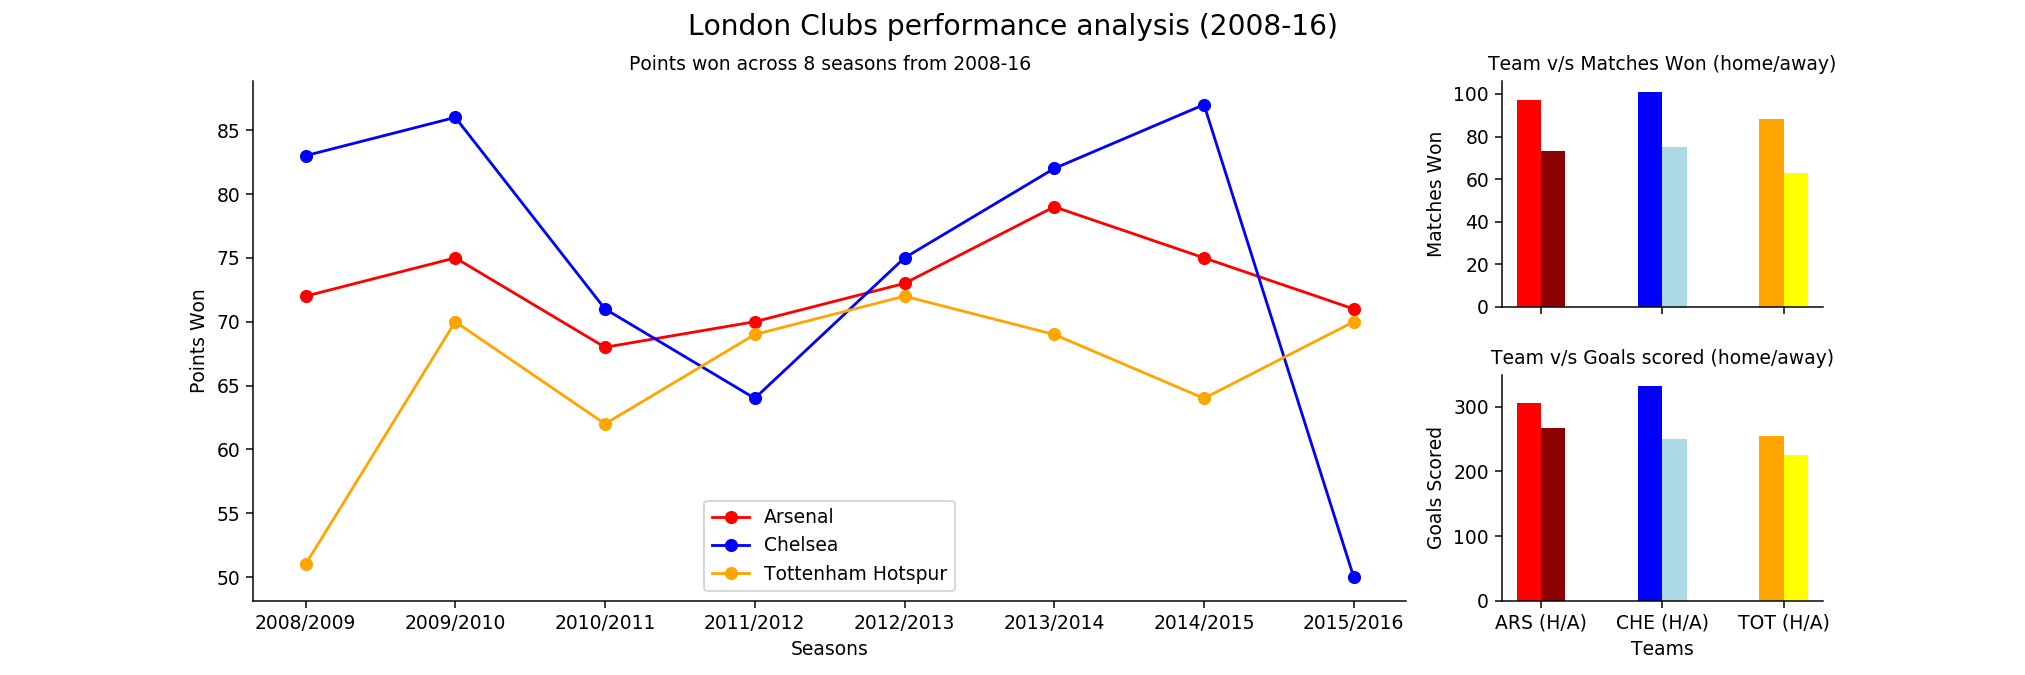

In [357]:
fig = plt.figure(figsize=(15,5))

fig.suptitle('London Clubs performance analysis (2008-16)', size=15)

# grid for the visualizations 
grid = gridspec.GridSpec(2,4,wspace=0.3, hspace=0.3)

points_line_graph = plt.subplot(grid[0:2,0:3]) #points from 2008-16
home_away_points = plt.subplot(grid[0,3]) # home/away performance from 2008-16
home_away_goals = plt.subplot(grid[1,3]) # home/away goals from 2008-16


# Line graph - points
color_count = 0
colors = ["red", "blue", "orange"]
for team in london_clubs:
    points_line_graph.plot(full_performance.loc[team, "season"], full_performance.loc[team, "total_points"], '-o', label = team, color = colors[color_count])
    color_count = color_count+1
    
points_line_graph.legend()
points_line_graph.set_title("Points won across 8 seasons from 2008-16", fontsize = 10)
points_line_graph.set_xlabel("Seasons")
points_line_graph.set_ylabel("Points Won")
points_line_graph.spines["right"].set_visible(False)
points_line_graph.spines["top"].set_visible(False)

In [360]:
# Bar graph - points
# home_away_points.bar()
home_record = get_home_record(epl_top6_matches)
home_record = (home_record.reset_index()
                          .set_index("home_team")
                          .loc[london_clubs,:]
                          .loc[:,:]
              )


away_record = get_away_record(epl_top6_matches)
away_record = (away_record.reset_index()
                          .set_index("away_team")
                          .loc[london_clubs,:]
                          .loc[:,:]
              )

away_colors = ['darkred', 'lightblue', 'yellow']
indexes = np.array(range(0,len(london_clubs),1))
home_away_points.bar(indexes-0.1, home_record[home_record["result"] == "home"].loc[:,'record'], width = 0.2, color = colors)
home_away_points.bar(indexes+0.1, away_record[away_record["result"] == "away"].loc[:,'record'], width = 0.2, color = away_colors)

home_away_points.set_title("Team v/s Matches Won (home/away)", fontsize = 10)
home_away_points.set_ylabel("Matches Won")

home_away_points.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False)

home_away_points.spines["right"].set_visible(False)
home_away_points.spines["top"].set_visible(False)

In [361]:
home_goals = get_home_goals(epl_top6_matches)
home_goals = (home_goals.reset_index()
                          .set_index("home_team")
                          .loc[london_clubs,:]
                          .loc[:,:]
              )


away_goals = get_away_goals(epl_top6_matches)
away_goals = (away_goals.reset_index()
                          .set_index("away_team")
                          .loc[london_clubs,:]
                          .loc[:,:]
              )

away_colors = ['darkred', 'lightblue', 'yellow']
indexes = np.array(range(0,len(london_clubs),1))
home_away_goals.bar(indexes-0.1, home_goals["total_home_goals"], width = 0.2, color = colors)
home_away_goals.bar(indexes+0.1, away_goals["total_away_goals"], width = 0.2, color = away_colors)

home_away_goals.set_title("Team v/s Goals scored (home/away)", fontsize=10)
home_away_goals.set_xlabel("Teams")
home_away_goals.set_ylabel("Goals Scored")

home_away_goals.set_xticklabels(["","ARS (H/A)","CHE (H/A)","TOT (H/A)"])

home_away_goals.spines["right"].set_visible(False)
home_away_goals.spines["top"].set_visible(False)

In [362]:
plt.savefig("london_clubs_performance_analysis.png", bbox_inches="tight")

### future use :

In [356]:
# most home goals across a period - top 10
(epl_top6_matches[epl_matches_top_6["home_team"].isin(top_6_teams.index.tolist())]
                 .groupby(["season","home_team"])['home_team_goal']
                 .agg(np.sum)
                 .to_frame("total_home_goals")
                 .sort_values('total_home_goals', ascending = False)
                 .iloc[0:10,:]
)

NameError: name 'epl_matches_top_6' is not defined

In [ ]:
epl_top6_matches["result"].value_counts()['draw']